In [1]:
import requests
from bs4 import BeautifulSoup
import spacy
from collections import Counter


In [4]:
import nltk
from nltk.corpus import wordnet

# Use NLTK and the specific corpus

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# BBC Dataset Load and cleaning

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of Missing Values: title          0
pubDate        0
link           0
description    0
publisher      0
dtype: int64
Column 'title' does not have any NaN values.
Column 'pubDate' does not have any NaN values.
Column 'link' does not have any NaN values.
Column 'description' does not have any NaN values.
Column 'publisher' does not have any NaN values.
Number of Duplicate Rows: 0


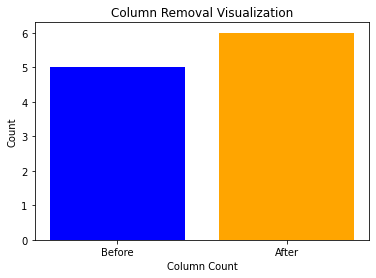

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23008 entries, 0 to 23007
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         23008 non-null  object
 1   pubDate       23008 non-null  object
 2   link          23008 non-null  object
 3   description   23008 non-null  object
 4   publisher     23008 non-null  object
 5   Contains_URL  23008 non-null  bool  
dtypes: bool(1), object(5)
memory usage: 921.3+ KB


In [5]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# Ensure NLTK resources are downloaded
nltk.download('punkt')

# Load the dataset
df_bbc = pd.read_csv('bbc_news.csv')  
# Count columns before removal
column_count_before = len(df_bbc.columns)
# Specify the name of the column want to remove
column_name_to_remove = 'guid'  

# Use the `drop()` method to remove the specified column
df_bbc = df_bbc.drop(column_name_to_remove, axis=1)

df_bbc['publisher'] = 'BBC'

# Check for missing values
missing_values = df_bbc.isnull().sum()

df_bbc.dropna()

print(f"Number of Missing Values: {missing_values}")

# Check for NaN values in each column
for column in df_bbc.columns:
    if df_bbc[column].isna().any():
        print(f"Column '{column}' has NaN values.")
    else:
        print(f"Column '{column}' does not have any NaN values.")

# Check for duplicate rows based on all columns
duplicates = df_bbc.duplicated()

# Remove duplicates from the DataFrame
#df_bbc.drop_duplicates(inplace=True)
#df_bbc.drop_duplicates()

# To display the duplicate rows (optional)
#duplicate_rows = df[duplicates]
#print("Duplicate Rows:")
#print(duplicate_rows)

# To count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of Duplicate Rows: {num_duplicates}")

# Specify the column want to check for URLs
column_name = 'link' 

# Define a regular expression pattern to match URLs
url_pattern = r'https?://\S+|www\.\S+'

# Use the inverse of str.contains() to check for rows that do not contain URLs
#df_bbc['does_not_contain_url'] = ~df_bbc[column_name].str.contains(url_pattern, case=False, flags=re.IGNORECASE)

# Check for rows containing a URL pattern
url_pattern = r'https?://\S+|www\.\S+'
df_bbc['Contains_URL'] = df_bbc['link'].str.contains(url_pattern, case=False, regex=True)

# Count rows with URL patterns
url_counts = df_bbc['Contains_URL'].value_counts()

# Calculate the sum of rows that do not contain URLs
#sum_not_containing_url = df_bbc['does_not_contain_url'].sum()

# Display the sum
#print(f"Sum of rows not containing URLs: {sum_not_containing_url}")

# Function to remove special characters
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Preprocess the text column
df_bbc['title'] = df_bbc['title'].apply(remove_special_characters)
df_bbc['description'] = df_bbc['description'].apply(remove_special_characters)


# Specify the column for calculate the sum of unique values
column_name = 'link'  
column_name_two = 'description'  

# Calculate the sum of unique values in the specified column
unique_sum = df_bbc[column_name].nunique()
unique_sum_two = df_bbc[column_name_two].nunique()

# Display the sum of unique values
#print(f"Sum of unique values in '{column_name}': {unique_sum}")
#print(f"Sum of unique values in '{column_name_two}': {unique_sum_two}")

# Specify the column want to check for identical data
column_name = 'link'  

# Use the `duplicated()` method to create a Boolean Series indicating duplicate values in the column
duplicates = df_bbc[column_name].duplicated(keep=False)

# Filter the DataFrame to include only rows with identical data in the specified column
identical_data_rows = df_bbc[duplicates].sum()

# Convert the 'date_column' to datetime format (adjust format as needed)
df_bbc['pubDate'] = pd.to_datetime(df_bbc['pubDate'], format='%a, %d %b %Y %H:%M:%S GMT')  # Adjust the format

# Convert the 'date_column' back to a standardized date format (YYYY-MM-DD)
df_bbc['pubDate'] = df_bbc['pubDate'].dt.strftime('%d-%m-%Y')  # Adjust the format

# Convert text columns to lowercase
text_columns = ['title', 'description']  # Replace with actual text column names in your dataset

for column in text_columns:
    df_bbc[column] = df_bbc[column].str.lower()

# Create a set of stop words 
stop_words = set(stopwords.words('english')) 

# Define a function to remove stop words from a sentence 
def remove_stop_words(sentence): 
    words = word_tokenize(sentence)  # Tokenize the sentence into words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remove stop words
    return ' '.join(filtered_words)

# Apply stop word removal to title and description columns
df_bbc['title'] = df_bbc['title'].apply(remove_stop_words)
df_bbc['description'] = df_bbc['description'].apply(remove_stop_words)



# Display the rows with identical data in the specified column
#print("Rows with Identical Data in '{}' Column:".format(column_name))
#print(identical_data_rows)
# Perform exploratory data analysis
# Summary statistics
summary_stats = df_bbc.describe()

# Distribution of labels
label_distribution = df_bbc['title'].value_counts() 
df_bbc.head()


# Count columns after removal
column_count_after = len(df_bbc.columns)

# Visualization - Bar chart showing column count before and after removal
plt.bar(['Before', 'After'], [column_count_before, column_count_after], color=['blue', 'orange'])
plt.xlabel('Column Count')
plt.ylabel('Count')
plt.title('Column Removal Visualization')
plt.show()


# Display the DataFrame without duplicates
#print(df_no_duplicates)

df_bbc.info()

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import numpy as np


# Ensure NLTK resources are downloaded
nltk.download('punkt')

nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('huffpost.csv') 
# Specify the names of the columns want to remove
columns_to_remove = ['category', 'authors']

# Use the `drop()` method to remove the specified columns
df = df.drop(columns=columns_to_remove)

# Check for empty cells and convert them to NaN
df = df.applymap(lambda x: np.nan if x == '' else x)

# Now you can check for null values using isnull()
null_values = df['short_description'][df.isnull().any(axis=1)]

# Display rows with null values
print(null_values)

Series([], Name: short_description, dtype: object)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#HUFFPOST News Dataset Load and Cleaning

In [6]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt


# Ensure NLTK resources are downloaded
nltk.download('punkt')

nltk.download('wordnet')

# Load the dataset
df_huff = pd.read_csv('huffpost.csv') 


# Specify the names of the columns want to remove
columns_to_remove = ['category', 'authors']

# Use the `drop()` method to remove the specified columns
df_huff = df_huff.drop(columns=columns_to_remove)

# Create a dictionary to map the old column names to new column names
column_mapping = {
    'date': 'pubDate',
    'short_description': 'description',
    'headline': 'title'
}

df_huff['publisher'] = 'HuffPost'

# Rename the columns using the rename() function
df_huff.rename(columns=column_mapping, inplace=True)

# Check for missing values
missing_values = df_huff.isnull().sum()

#df_huff.dropna()

print(f"Number of Missing Values: {missing_values}")

# Check for NaN values in each column
for column in df_huff.columns:
    if df_huff[column].isna().any():
        print(f"Column '{column}' has NaN values.")
    else:
        print(f"Column '{column}' does not have any NaN values.")


# Replace NaN values with the corresponding title value
df_huff['description'] = df_huff['description'].fillna(df_huff['title'])
df_huff['title'] = df_huff['title'].fillna(df_huff['description'])

# Check for duplicate rows based on all columns
duplicates = df_huff.duplicated()

# Remove duplicates from the DataFrame
df_huff.drop_duplicates()

# To display the duplicate rows (optional)
#duplicate_rows = df[duplicates]
#print("Duplicate Rows:")
#print(duplicate_rows)

# To count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of Duplicate Rows: {num_duplicates}")

# Specify the column want to check for URLs
column_name = 'link'

# Define a regular expression pattern to match URLs
url_pattern = r'https?://\S+|www\.\S+'

# Use the inverse of str.contains() to check for rows that do not contain URLs
#df_huff['does_not_contain_url'] = ~df_huff[column_name].str.contains(url_pattern, case=False, flags=re.IGNORECASE)

# Calculate the sum of rows that do not contain URLs
#sum_not_containing_url = df_huff['does_not_contain_url'].sum()

# Display the sum
#print(f"Sum of rows not containing URLs: {sum_not_containing_url}")

# Function to remove special characters
def remove_special_characters(text):
    if isinstance(text, str):  # Check if the input is a string-like object
        return re.sub(r'[^a-zA-Z0-9\s]', '', text)
    else:
        return text


# Preprocess the text column
df_huff['title'] = df_huff['title'].apply(remove_special_characters)
df_huff['description'] = df_huff['description'].apply(remove_special_characters)

# Specify the column for which want to calculate the sum of unique values
column_name = 'link' 
column_name_two = 'title'

# Calculate the sum of unique values in the specified column
unique_sum = df_huff[column_name].nunique()
unique_sum_two = df_huff[column_name_two].nunique()

# Display the sum of unique values
print(f"Sum of unique values in '{column_name}': {unique_sum}")
print(f"Sum of unique values in '{column_name_two}': {unique_sum_two}")

# Specify the column want to check for identical data
#column_name = 'link'

# Use the `duplicated()` method to create a Boolean Series indicating duplicate values in the column
#duplicates = df_huff[column_name].duplicated(keep=False)

# Filter the DataFrame to include only rows with identical data in the specified column
identical_data_rows = df_huff[duplicates].sum()

# Remove duplicates from the DataFrame
#df_huff.drop_duplicates(inplace=True)
df_huff.drop_duplicates()

# Display the rows with identical data in the specified column
print("Rows with Identical Data in '{}' Column:".format(column_name))
print(identical_data_rows)
# Convert the 'date_column' to datetime format (adjust format as needed)
df_huff['pubDate'] = pd.to_datetime(df_huff['pubDate'], format='%Y-%m-%d')  # Adjust the format

# Convert the 'date_column' back to a standardized date format (YYYY-MM-DD)
df_huff['pubDate'] = df_huff['pubDate'].dt.strftime('%d-%m-%Y')  # Adjust the format

# Convert text columns to lowercase
text_columns = ['title', 'description']  # Replace with actual text column names in your dataset

for column in text_columns:
    df_huff[column] = df_huff[column].str.lower()

# Create a set of stop words 
stop_words = set(stopwords.words('english')) 

# Define a function to remove stop words from a sentence 
def remove_stop_words(sentence): 
    words = word_tokenize(sentence)  # Tokenize the sentence into words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remove stop words
    return ' '.join(filtered_words)

# Apply stop word removal to title and description columns
df_huff['title'] = df_huff['title'].apply(remove_stop_words)
df_huff['description'] = df_huff['description'].apply(remove_stop_words)
# Basic Exploratory Data Analysis (EDA)
# Histogram of the text length in the 'description' column
#df_huff['description_length'] = df_huff['description'].apply(len)
# Check for rows containing a URL pattern
url_pattern = r'https?://\S+|www\.\S+'
df_huff['Contains_URL'] = df_huff['link'].str.contains(url_pattern, case=False, regex=True)

# Count rows with URL patterns
url_counts = df_huff['Contains_URL'].value_counts()

# Text Preprocessing: Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text.lower())
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatization to title and description columns
df_huff['title'] = df_huff['title'].apply(lemmatize_text)
df_huff['description'] = df_huff['description'].apply(lemmatize_text)
# Tokenize the 'title' column
#df_huff['title_tokens'] = df_huff['title'].apply(lambda x: word_tokenize(x))

# Tokenize the 'description' column
#df_huff['description_tokens'] = df_huff['description'].apply(lambda x: word_tokenize(x))

# Display the tokenized columns
#print(df_huff[['title_tokens', 'description_tokens']].head())


    
df_huff.info()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Number of Missing Values: link           0
title          0
description    0
pubDate        0
publisher      0
dtype: int64
Column 'link' does not have any NaN values.
Column 'title' does not have any NaN values.
Column 'description' does not have any NaN values.
Column 'pubDate' does not have any NaN values.
Column 'publisher' does not have any NaN values.
Number of Duplicate Rows: 0
Sum of unique values in 'link': 19999
Sum of unique values in 'title': 19924
Rows with Identical Data in 'link' Column:
link           0.0
title          0.0
description    0.0
pubDate        0.0
publisher      0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   link          19999 non-null  object
 1   title         19999 non-null  object
 2   description   19999 non-null  object
 3   pubDate       19999 non-null  object
 4   publisher     199

In [ ]:
# CNN News Dataset Load and cleaning

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np

# Ensure NLTK resources are downloaded
nltk.download('punkt')

# Load the dataset
df = pd.read_csv('CNN_news.csv')  
# Function to remove special characters

# Specify the names of the columns want to remove
columns_to_remove = ['Author', 'Index','Category', 'Section','Keywords','Second headline','Article text']  

# Use the `drop()` method to remove the specified columns
df = df.drop(columns=columns_to_remove)

# Check for empty cells and convert them to NaN
df = df.applymap(lambda x: np.nan if x == '' else x)

# Now you can check for null values using isnull()
null_values = df[df.isnull().any(axis=1)]

# Display rows with null values
print(null_values)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Empty DataFrame
Columns: [Date published, Url, Headline, Description]
Index: []


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of Missing Values: pubDate        0
link           0
title          0
description    0
publisher      0
dtype: int64
Column 'pubDate' does not have any NaN values.
Column 'link' does not have any NaN values.
Column 'title' does not have any NaN values.
Column 'description' does not have any NaN values.
Column 'publisher' does not have any NaN values.
Number of Duplicate Rows: 0


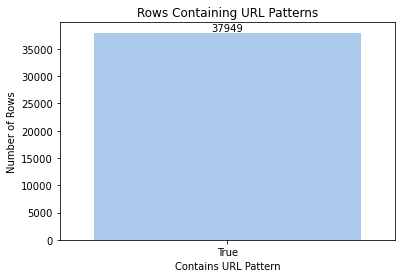

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37949 entries, 0 to 37948
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pubDate       37949 non-null  object
 1   link          37949 non-null  object
 2   title         37949 non-null  object
 3   description   37949 non-null  object
 4   publisher     37949 non-null  object
 5   Contains_URL  37949 non-null  bool  
dtypes: bool(1), object(5)
memory usage: 1.5+ MB


In [7]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# Ensure NLTK resources are downloaded
nltk.download('punkt')

# Load the dataset
df_cnn = pd.read_csv('CNN_news.csv')  

# Specify the names of the columns want to remove
columns_to_remove = ['Author', 'Index','Category', 'Section','Keywords','Second headline','Article text']  

# Use the `drop()` method to remove the specified columns
df_cnn = df_cnn.drop(columns=columns_to_remove)

# Create a dictionary to map the old column names to new column names
column_mapping = {
    'Headline': 'title',
    'Date published': 'pubDate',
    'Url': 'link',
    'Description': 'description',
}

# Rename the columns using the rename() function
df_cnn.rename(columns=column_mapping, inplace=True)

# Add a new column with the default value
df_cnn['publisher'] = 'CNN'

# Check for missing values
missing_values = df_cnn.isnull().sum()

df_cnn.dropna()

print(f"Number of Missing Values: {missing_values}")

# Check for NaN values in each column
for column in df_cnn.columns:
    if df_cnn[column].isna().any():
        print(f"Column '{column}' has NaN values.")
    else:
        print(f"Column '{column}' does not have any NaN values.")
        
# Check for duplicate rows based on all columns
duplicates = df_cnn.duplicated()

# Remove duplicates from the DataFrame
#df_cnn.drop_duplicates(inplace=True)
df_cnn.drop_duplicates()
# To display the duplicate rows (optional)
#duplicate_rows = df[duplicates]
#print("Duplicate Rows:")
#print(duplicate_rows)

# To count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of Duplicate Rows: {num_duplicates}")

df_cnn['description'] = df_cnn['description'].fillna(df_cnn['title'])
df_cnn['title'] = df_cnn['title'].fillna(df_cnn['description'])

# Specify the column want to check for URLs
column_name = 'link'  

# Define a regular expression pattern to match URLs
url_pattern = r'https?://\S+|www\.\S+'

# Use the inverse of str.contains() to check for rows that do not contain URLs
#df_cnn['does_not_contain_url'] = ~df_cnn[column_name].str.contains(url_pattern, case=False, flags=re.IGNORECASE)

# Calculate the sum of rows that do not contain URLs
#sum_not_containing_url = df_cnn['does_not_contain_url'].sum()

# Display the sum
#print(f"Sum of rows not containing URLs: {sum_not_containing_url}")

# Check for rows containing a URL pattern
url_pattern = r'https?://\S+|www\.\S+'
df_cnn['Contains_URL'] = df_cnn['link'].str.contains(url_pattern, case=False, regex=True)

# Count rows with URL patterns
url_counts = df_cnn['Contains_URL'].value_counts()

# Function to remove special characters
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Preprocess the text column
df_cnn['title'] = df_cnn['title'].apply(remove_special_characters)
df_cnn['description'] = df_cnn['description'].apply(remove_special_characters)

# Create a set of stop words 
stop_words = set(stopwords.words('english')) 

# Define a function to remove stop words from a sentence 
def remove_stop_words(sentence): 
    words = word_tokenize(sentence)  # Tokenize the sentence into words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remove stop words
    return ' '.join(filtered_words)

# Apply stop word removal to title and description columns
df_cnn['title'] = df_cnn['title'].apply(remove_stop_words)
df_cnn['description'] = df_cnn['description'].apply(remove_stop_words)

# Convert text columns to lowercase
text_columns = ['title', 'description']  # Replace with actual text column names in your dataset

for column in text_columns:
    df_cnn[column] = df_cnn[column].str.lower()

# Specify the column for which want to calculate the sum of unique values
column_name = 'link' 
column_name_two = 'title'

# Calculate the sum of unique values in the specified column
unique_sum = df_cnn[column_name].nunique()
unique_sum_two = df_cnn[column_name_two].nunique()

# Display the sum of unique values
#print(f"Sum of unique values in '{column_name}': {unique_sum}")
#print(f"Sum of unique values in '{column_name_two}': {unique_sum_two}")

# Specify the column want to check for identical data
column_name = 'title'

# Use the `duplicated()` method to create a Boolean Series indicating duplicate values in the column
#duplicates = df_cnn[column_name].duplicated(keep=False)

# Remove duplicates from the DataFrame
#df_cnn.drop_duplicates(inplace=True)

# Filter the DataFrame to include only rows with identical data in the specified column
#identical_data_rows = df_cnn[duplicates].sum()

# Display the rows with identical data in the specified column
#print("Rows with Identical Data in '{}' Column:".format(column_name))
#print(identical_data_rows)

# Convert the 'date_column' to datetime format (adjust format as needed)
df_cnn['pubDate'] = pd.to_datetime(df_cnn['pubDate'], format='%Y-%m-%d')  # Adjust the format

# Convert the 'date_column' back to a standardized date format (YYYY-MM-DD)
df_cnn['pubDate'] = df_cnn['pubDate'].dt.strftime('%d-%m-%Y')  # Adjust the format



# Plotting
plt.figure(figsize=(6, 4))
url_plot = sns.barplot(x=url_counts.index.astype(str), y=url_counts.values, palette='pastel')
plt.title('Rows Containing URL Patterns')
plt.xlabel('Contains URL Pattern')
plt.ylabel('Number of Rows')
for index, value in enumerate(url_counts):
    url_plot.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

df_cnn.info()

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# Ensure NLTK resources are downloaded
nltk.download('punkt')

# Load the dataset
df_cnbc = pd.read_csv('cnbc_news.csv') 

# Count columns before removal
column_count_before = len(df_cnbc.columns)

# Specify the names of the columns want to remove
columns_to_remove = ['author', 'short_description','header_image', 'keywords','raw_description','scraped_at']

# Use the `drop()` method to remove the specified columns
df_cnbc = df_cnbc.drop(columns=columns_to_remove)


# Check for missing values
missing_values = df_cnbc.isnull().sum()

df_cnbc.dropna(axis=1)

df_cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         625 non-null    object
 1   url           625 non-null    object
 2   published_at  625 non-null    object
 3   publisher     625 non-null    object
 4   description   593 non-null    object
dtypes: object(5)
memory usage: 24.5+ KB


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# CNBC News Dataset Load and cleaning

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of Missing Values: title           0
link            0
pubDate         0
publisher       0
description    32
dtype: int64
Column 'title' does not have any NaN values.
Column 'link' does not have any NaN values.
Column 'pubDate' does not have any NaN values.
Column 'publisher' does not have any NaN values.
Column 'description' has NaN values.
Number of Duplicate Rows: 0
Sum of unique values in 'link': 625
Sum of unique values in 'title': 625
Rows with Identical Data in 'link' Column:
title           0.0
link            0.0
pubDate         0.0
publisher       0.0
description     0.0
Contains_URL    0.0
dtype: float64


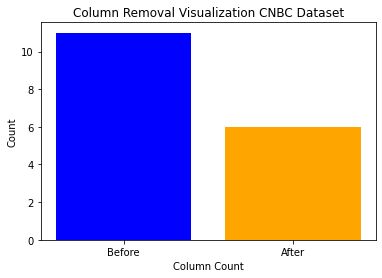

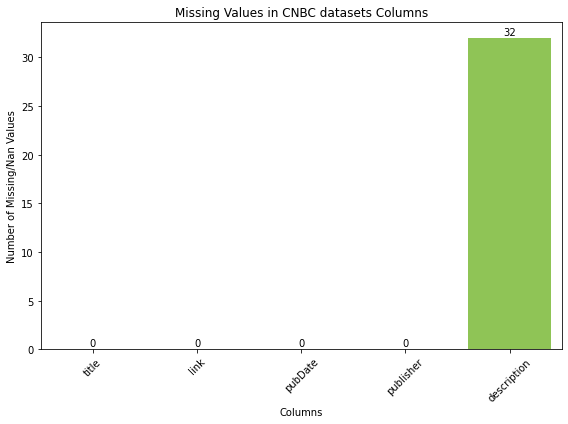

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         625 non-null    object
 1   link          625 non-null    object
 2   pubDate       625 non-null    object
 3   publisher     625 non-null    object
 4   description   625 non-null    object
 5   Contains_URL  625 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 25.1+ KB


In [11]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# Ensure NLTK resources are downloaded
nltk.download('punkt')

# Load the dataset
df_cnbc = pd.read_csv('cnbc_news.csv') 

# Count columns before removal
column_count_before = len(df_cnbc.columns)

# Specify the names of the columns want to remove
columns_to_remove = ['author', 'short_description','header_image', 'keywords','raw_description','scraped_at']

# Use the `drop()` method to remove the specified columns
df_cnbc = df_cnbc.drop(columns=columns_to_remove)

# Create a dictionary to map the old column names to new column names
column_mapping = {
    'published_at': 'pubDate',
    'url': 'link',
}

# Rename the columns using the rename() function
df_cnbc.rename(columns=column_mapping, inplace=True)

# Check for missing values
missing_values = df_cnbc.isnull().sum()

df_cnbc.dropna(axis=1)

print(f"Number of Missing Values: {missing_values}")

# Check for NaN values in each column
for column in df_cnbc.columns:
    if df_cnbc[column].isna().any():
        print(f"Column '{column}' has NaN values.")
    else:
        print(f"Column '{column}' does not have any NaN values.")

# Replace NaN values with the corresponding title value
df_cnbc['description'] = df_cnbc['description'].fillna(df_cnbc['title'])

# Check for duplicate rows based on all columns
duplicates = df_cnbc.duplicated()

# Remove duplicates from the DataFrame
#df_cnbc.drop_duplicates(inplace=True)
df_cnbc.drop_duplicates()
# To display the duplicate rows (optional)
#duplicate_rows = df[duplicates]
#print("Duplicate Rows:")
#print(duplicate_rows)

# To count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of Duplicate Rows: {num_duplicates}")

# Specify the column want to check for URLs
column_name = 'link'

# Define a regular expression pattern to match URLs
#url_pattern = r'https?://\S+|www\.\S+'

# Check for rows containing a URL pattern
url_pattern = r'https?://\S+|www\.\S+'
df_cnbc['Contains_URL'] = df_cnbc['link'].str.contains(url_pattern, case=False, regex=True)

# Count rows with URL patterns
url_counts = df_cnbc['Contains_URL'].value_counts()

# Use the inverse of str.contains() to check for rows that do not contain URLs
#df_cnbc['does_not_contain_url'] = ~df_cnbc[column_name].str.contains(url_pattern, case=False, flags=re.IGNORECASE)

# Calculate the sum of rows that do not contain URLs
#sum_not_containing_url = df_cnbc['does_not_contain_url'].sum()

# Display the sum
#print(f"Sum of rows not containing URLs: {sum_not_containing_url}")

# Convert text columns to lowercase
text_columns = ['title', 'description']  # Replace with actual text column names in your dataset

for column in text_columns:
    df_huff[column] = df_huff[column].str.lower()

# Function to remove special characters
def remove_special_characters(text):
    if isinstance(text, str):  # Check if the input is a string-like object
        return re.sub(r'[^a-zA-Z0-9\s]', '', text)
    else:
        return text


# Preprocess the text column
df_cnbc['title'] = df_cnbc['title'].apply(remove_special_characters)
df_cnbc['description'] = df_cnbc['description'].apply(remove_special_characters)

# Specify the column for which want to calculate the sum of unique values
column_name = 'link' 
column_name_two = 'title'

# Calculate the sum of unique values in the specified column
unique_sum = df_cnbc[column_name].nunique()
unique_sum_two = df_cnbc[column_name_two].nunique()

# Display the sum of unique values
print(f"Sum of unique values in '{column_name}': {unique_sum}")
print(f"Sum of unique values in '{column_name_two}': {unique_sum_two}")

# Specify the column want to check for identical data
column_name = 'link'

# Use the `duplicated()` method to create a Boolean Series indicating duplicate values in the column
duplicates = df_cnbc[column_name].duplicated(keep=False)

# Filter the DataFrame to include only rows with identical data in the specified column
identical_data_rows = df_cnbc[duplicates].sum()

# Remove duplicates from the DataFrame
#df_cnbc.drop_duplicates(inplace=True)
df_cnbc.drop_duplicates()
# Display the rows with identical data in the specified column
print("Rows with Identical Data in '{}' Column:".format(column_name))
print(identical_data_rows)

# Count columns after removal
column_count_after = len(df_cnbc.columns)

# Visualization - Bar chart showing column count before and after removal
plt.bar(['Before', 'After'], [column_count_before, column_count_after], color=['blue', 'orange'])
plt.xlabel('Column Count')
plt.ylabel('Count')
plt.title('Column Removal Visualization CNBC Dataset')
plt.show()

# Plot NaN values using a bar plot
plt.figure(figsize=(8, 6))
nan_plot = sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title('Missing Values in CNBC datasets Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Missing/Nan Values')
plt.xticks(rotation=45)
for index, value in enumerate(missing_values):
    nan_plot.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

df_cnbc.info()


In [ ]:
import pandas as pd

# Concatenate the four DataFrames along the rows (simple appending)
merged_df = pd.concat([df_bbc, df_huff, df_cnn, df_cnbc], ignore_index=True,axis = 0)

# Save the merged DataFrame to a new CSV file if needed
merged_df.to_csv('merged_files_news.csv', index=False)

missing_values = merged_df.isnull().sum()
print (missing_values)
merged_df.dropna()
# Get the total number of rows in the DataFrame
total_rows = merged_df.shape[0]

# Print the total number of rows
#print("Total Rows:", total_rows)
#merged_df.head()

In [4]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('merged_files_news.csv')

df['description'] = df['description'].fillna(df['title'])
df['title'] = df['title'].fillna(df['description'])


# Remove rows with any NaN/null values
df_cleaned = df.dropna()

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('cleaned_your_file_new.csv', index=False)

missing_values = df_cleaned.isnull().sum()
print (missing_values)

title           0
pubDate         0
link            0
description     0
publisher       0
Contains_URL    0
dtype: int64


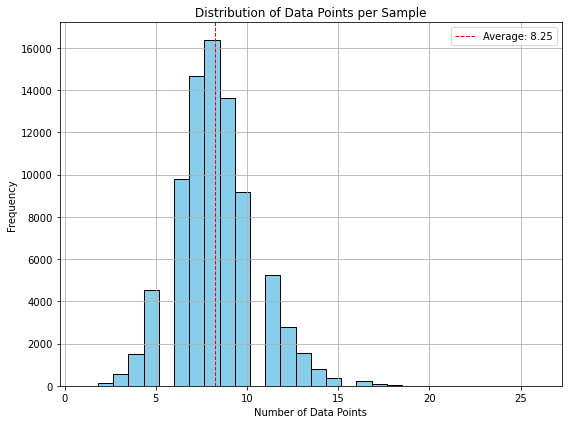

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

df = pd.read_csv('cleaned_your_file_new.csv')

# Calculate total data points and number of samples
total_data_points = []
num_samples = len(df['title'])

# Count total data points in each sample
for sample in df['title']:
    words = word_tokenize(sample)
    total_data_points.append(len(words))

# Calculate the average
average_data_points = sum(total_data_points) / num_samples

# Create a histogram to visualize the distribution of data points per sample
plt.figure(figsize=(8, 6))
plt.hist(total_data_points, bins=30, color='skyblue', edgecolor='black')
plt.axvline(average_data_points, color='red', linestyle='dashed', linewidth=1, label=f'Average: {average_data_points:.2f}')
plt.xlabel('Number of Data Points')
plt.ylabel('Frequency')
plt.title('Distribution of Data Points per Sample')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


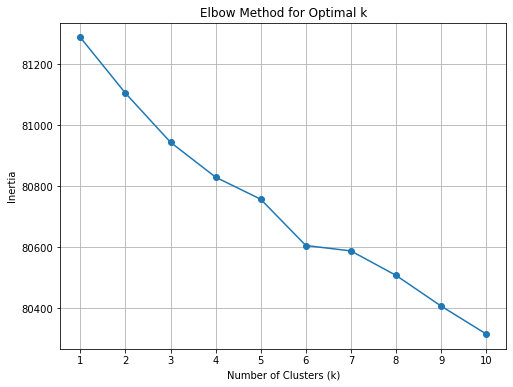

Optimal K value found using the elbow method: 1


In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

# Read your data from the CSV file into a DataFrame
df = pd.read_csv('cleaned_your_file_new.csv')

# Preprocess your data as required

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['title'])

# Perform KMeans for various k values
k_values = range(1, 11)  # Try different k values
inertia_values = []

for k in k_values:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

diff = [inertia_values[i] - inertia_values[i+1] for i in range(len(inertia_values)-1)]
optimal_k = diff.index(max(diff)) + 1

print(f"Optimal K value found using the elbow method: {optimal_k}")


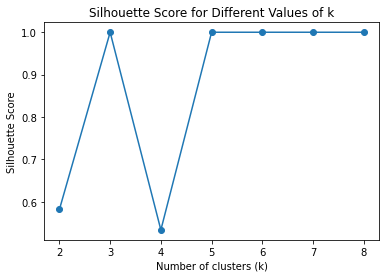

Best k value based on silhouette score: 3


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# Read your data from the CSV file into a DataFrame
df = pd.read_csv('cleaned_your_file_new.csv')

# Preprocess your data as required
user_input = [
            "Protests across Russia see thousands detained",
            "Protests across Russia see thousands detained document.",
            "Protests thousands detained across Russia see",
            "thousands detained across Russia see Protests",
             "This thousands detained across Russia.",
            "Russia see thousands detained document.",
            "Protests across Russia see thousands",
            "detained Protests across Russia see thousands",
        ]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(user_input)

# Evaluate silhouette scores for various k values
k_values = range(2, 9)  # Try different k values, starting from 2
silhouette_scores = []

for k in k_values:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)



# Plotting the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()

# Find the best k value based on silhouette scores
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k value based on silhouette score: {best_k}")


C:\Users\Anu\AppData\Local\Temp/ipykernel_31448/1482738390.py:32: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(tfidf_matrix)
C:\Users\Anu\AppData\Local\Temp/ipykernel_31448/1482738390.py:32: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(tfidf_matrix)
C:\Users\Anu\AppData\Local\Temp/ipykernel_31448/1482738390.py:32: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(tfidf_matrix)


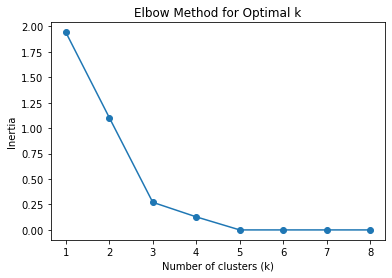

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read your data from the CSV file into a DataFrame
df = pd.read_csv('cleaned_your_file_new.csv')

# Preprocess your data as required

user_input = [
            "Protests across Russia see thousands detained",
            "Protests across Russia see thousands detained document.",
            "Protests thousands detained across Russia see",
            "thousands detained across Russia see Protests",
             "This thousands detained across Russia.",
            "Russia see thousands detained document.",
            "Protests across Russia see thousands",
            "detained Protests across Russia see thousands",
        ]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(user_input)

# Perform KMeans for various k values
k_values = range(1, 9)  # Try different k values
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values against k values
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

diff = [inertia_values[i] - inertia_values[i+1] for i in range(len(inertia_values)-1)]
optimal_k = diff.index(max(diff)) + 1



In [ ]:
import nltk
from nltk.corpus import wordnet

# Use NLTK and the specific corpus

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from fuzzywuzzy import fuzz
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pymysql
import random

import time
from flask import Flask, render_template, request, g
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
app = Flask(__name__)

@app.before_request
def before_request():
    g.request_start_time = time.time()
    g.request_time = lambda: "%.5fs" % (time.time() - g.request_start_time)

# Function to check if the input contains a link
def contains_link(text):
    # Define a regular expression pattern to match URLs
    url_pattern = r'https?://\S+|www\.\S+'
    
    # Use re.search to find a match in the input
    match = re.search(url_pattern, text)
    
    return match is not None

# Function to parse the title from Link
def parse_title(url):
    html_page = urlopen(url)
    soup = BeautifulSoup(html_page, 'html.parser')
    title = soup.title.string
    return title

# Create a set of stop words 
stop_words = set(stopwords.words('english')) 

# Define a function to remove stop words from a sentence 
def remove_stop_words(sentence): 
  # Split the sentence into individual words 
  words = sentence.split() 
  
  # Use a list comprehension to remove stop words 
  filtered_words = [word for word in words if word not in stop_words] 
  
  # Join the filtered words back into a sentence 
  return ' '.join(filtered_words)

# Function to calculate string match accuracy
def calculate_match_accuracy(reference_string, test_string):
    return fuzz.ratio(reference_string, test_string)

# Function to perform K-Means clustering on a set of texts
def cluster_texts(texts, num_clusters):
    try:
        # Create TF-IDF vectors for the texts
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform(texts)
        # Perform K-Means clustering
        kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
        
        # Perform Mini-Batch K-Means clustering
        #kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=42, batch_size=1000, max_no_improvement=10, reassignment_ratio=0.01)
        
        kmeans.fit(tfidf_matrix)

        # Get cluster assignments for each text
        cluster_assignments = kmeans.labels_
        
        #inertia = kmeans.inertia_
        #print(f"Inertia: {inertia}")

        # Evaluate Silhouette Score
        #silhouette_avg = silhouette_score(tfidf_matrix, kmeans.labels_)
        #print(f"Silhouette Score: {silhouette_avg}")

        return cluster_assignments

    except Exception as e:
        print(f"Error processing texts: {e}")
        return None

# Function to check user input text match accuracy against CSV file
def check_user_input_accuracy(user_input, csv_filename, num_clusters):
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_filename)

        # Extract the text column from the CSV
        csv_texts = df['title'].tolist()
        
        # Cluster both the user input and CSV texts
        user_input_cluster_assignments = cluster_texts(user_input, num_clusters)
        csv_cluster_assignments = cluster_texts(csv_texts, num_clusters)

        # Determine the cluster of the user input text
        user_input_cluster = user_input_cluster_assignments[0]

        # Find the CSV texts that belong to the same cluster as the user input
        matching_csv_texts = [csv_texts[i] for i, cluster in enumerate(csv_cluster_assignments) if cluster == user_input_cluster]

        # Calculate accuracy by comparing the user input with each matching CSV text
        accuracies = [calculate_match_accuracy(user_input, csv_text) for csv_text in matching_csv_texts]
        
        # Calculate accuracy for each user input against CSV texts
        max_accuracy = 0
        for user_text in user_input:
            for csv_text in matching_csv_texts:
                #accuracy = calculate_match_accuracy(user_text, csv_text)
                accuracy = calculate_match_accuracy(user_text, csv_text)
                max_accuracy = max(max_accuracy, accuracy)


        # Determine the highest accuracy among the matching texts
        #max_accuracy = max(accuracies)

        return max_accuracy

    except Exception as e:
        print(f"Error processing user input or CSV file: {e}")
        return None
    

    
# Function for inserting user fake news check details in to database
def data_insert_db(email,news_data,status):
    # database connection
    connection = pymysql.connect(host="localhost", port=3306, user="root", passwd="", database="fake_news_data")

    cursor = connection.cursor()    

    # Insert data into the table
    insert_query = "INSERT INTO news_articles_data (email, news_data, status) VALUES (%s, %s, %s)"
    cursor.execute(insert_query, (email, news_data, status))

    # Commit the changes to the database
    connection.commit()

    # Execute SQL queries
    cursor.execute("SELECT * FROM news_articles_data")

    # Fetch all rows from the result set
    result = cursor.fetchall()

    # Print the results
    for row in result:
        print(row)

    # Close the cursor and the connection when done
    cursor.close()
    connection.close()
@app.route("/")
def index():
    return render_template('index.html')
@app.route('/check_news', methods=['POST'])
def check_news():
    if request.method == 'POST':
        user_input = request.form['news_text']
        email = request.form['email']
        csv_filename = "cleaned_your_file_new.csv"
         # Check if the user input contains a link
        if contains_link(user_input):
            user_input = parse_title(user_input)
            print("User input contains a link.")
        else:
            print("User input is plain text.")

        filtered_sentence = remove_stop_words(user_input) 
        #num_clusters = min(1, len(user_input) + 1)   # Adjust the number of clusters as needed
        
        num_clusters = 3 # based on elbow and silhoutte method
        
        # Split the text into words
        words = user_input.split()

        # Generate three different permutations of shuffled words
        shuffled_user_contents = []
        for _ in range(2):
            random.shuffle(words)
            shuffled_user_contents.append(' '.join(words))
        
        shuffled_user_contents.append(user_input)
        print(shuffled_user_contents)
         # Perform a comprehensive analysis
        #sentiment = comprehensive_analysis(user_input)
      
        accuracy = check_user_input_accuracy(shuffled_user_contents, csv_filename, num_clusters)
        #status = 0
        #if accuracy is not None:
          #  print(f"User Input Match Accuracy: {accuracy}%")
        #print (sentiment)
        if accuracy is not None and accuracy > 90:
            status = 'Real'
        elif accuracy is not None and accuracy >= 50:
            status = 'Neutral'
        elif accuracy is not None and accuracy <= 50:
            status = 'Fake'
        else:
            # Handle the case when accuracy is None
            print("Error: Accuracy value is None or invalid.")

        data_insert_db(email,user_input,status)
        # Evaluate Inertia
        
    if accuracy is not None:
       # print(f"Match Accuracy in '{csv_filename}':")
        return render_template('result.html', news_text=user_input, result=accuracy, status=status)

if __name__ == "__main__":
    app.run()




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Anu\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Jan/2024 16:46:56] "GET / HTTP/1.1" 200 -


User input is plain text.
['Russia across detained thousands see Protests', 'detained thousands across Russia see Protests', 'Protests across Russia see thousands detained']


C:\Users\Anu\AppData\Local\Temp/ipykernel_42644/2805022952.py:85: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(tfidf_matrix)
127.0.0.1 - - [09/Jan/2024 16:48:49] "POST /check_news HTTP/1.1" 200 -


In [ ]:
def shutdown_server():
    func = request.environ.get('werkzeug.server.shutdown')
    if func is None:
        raise RuntimeError('Not running with the Werkzeug Server')
    func()
    
@app.get('/shutdown')
def shutdown():
    shutdown_server()
    return 'Server shutting down...'

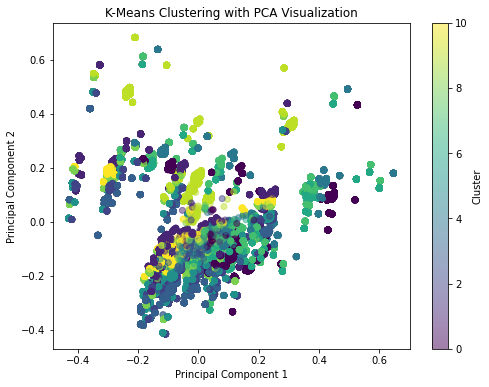

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

# Read CSV file
df = pd.read_csv('merged_file_new.csv')

# Assuming you have a DataFrame 'df' with a 'text' column

# Assuming 'df' is your DataFrame with a 'text' column containing text data
# Replace NaN values with an empty string
#df['title'].fillna('', inplace=True)

# Vectorize text data
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(df['pubDate'])

# Vectorize text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['pubDate'])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=11)  # Set the number of clusters
kmeans.fit(X)

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', alpha=0.5)
plt.title('K-Means Clustering with PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()



In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import numpy as np

# Read CSV file
df = pd.read_csv('merged_files_news.csv')
# Preprocess the text data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(merged_df['title'])  # Replace 'text_column' with your text column

# Initialize lists to store inertias and corresponding cluster sizes
cluster_sizes = range(1, 20)  # Vary the range of cluster sizes as needed
inertias = []

# Calculate inertia for different cluster sizes
for size in cluster_sizes:
    minibatch_kmeans = KMeans(n_clusters=size, random_state=42)
    minibatch_kmeans.fit(tfidf_matrix)
    inertias.append(minibatch_kmeans.inertia_)

# Plotting the line graph
plt.plot(cluster_sizes, inertias, marker='o', linestyle='-')
plt.title('KMeans inertia vs Cluster Size')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_sizes)
plt.grid(True)
plt.show()

0


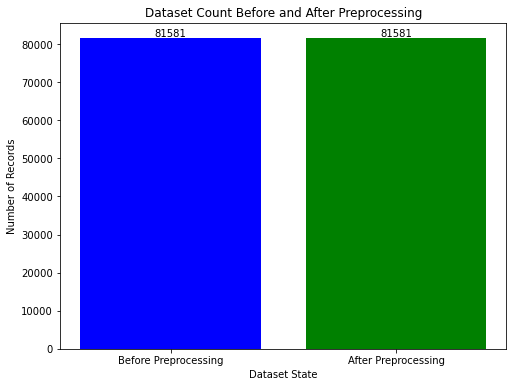

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_b_bbc_news = pd.read_csv('bbc_news.csv') 
df_b_huffpost_news = pd.read_csv('huffpost.csv') 
df_b_CNN_news = pd.read_csv('CNN_news.csv') 
df_b_cnbc_news = pd.read_csv('cnbc_news.csv') 
# and 'df_after' is the DataFrame after preprocessing

# Concatenate the four DataFrames along the rows (simple appending)
df_before = pd.concat([df_b_bbc_news, df_b_huffpost_news, df_b_CNN_news, df_b_cnbc_news], ignore_index=True)

# Load the dataset
df_after = pd.read_csv('cleaned_your_file_new.csv') 

counter = df_after['title'].isnull().sum()
print (counter)

# Finding the indices where null values exist
null_indices = df_after['title'].index[df_after.isnull().any(axis=1)].tolist()

# Displaying indices and corresponding rows with null values
for idx in null_indices:
    print(f"Index {idx}: {df_after.loc[idx]}")

# Count of records before and after preprocessing
count_before = len(df_before)
count_after = len(df_after)

# Create a bar plot to visualize the counts
plt.figure(figsize=(8, 6))
bars = plt.bar(['Before Preprocessing', 'After Preprocessing'], [count_before, count_after], color=['blue', 'green'])
plt.title('Dataset Count Before and After Preprocessing')
plt.xlabel('Dataset State')
plt.ylabel('Number of Records')

# Add count annotations to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')

plt.show()



#plt.figure(figsize=(6, 4))
#sns.countplot(data=df_cnbc, x='publisher')  # Replace 'label_column' with the actual column name containing labels
#plt.title('Distribution of datasets')
#plt.xlabel('Datasets')
#plt.ylabel('Row Count')
#plt.show()

#df_cnbc.isnull().sum().plot.bar()
#plt.show()

In [17]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize

df = pd.read_csv('cleaned_your_file_new.csv')
# Calculate total data points and number of samples
total_data_points = 0
num_samples = len(df['title'])

# Count total data points in the dataset
for sample in df['title']:
    words = word_tokenize(sample)
    total_data_points += len(words)

# Calculate the average
average_data_points = total_data_points / num_samples

print(f"Total data points: {total_data_points}")
print(f"Number of samples: {num_samples}")
print(f"Average data points per sample: {average_data_points}")



Total data points: 672653
Number of samples: 81581
Average data points per sample: 8.24521641068386
